# EMAIL SPAM CLASSIFIER

In [1]:
# Dependencies:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5338,ham,So when do you wanna gym?,NaN,NaN,NaN
4206,ham,"Lets use it next week, princess :)",NaN,NaN,NaN
654,ham,Did u got that persons story,NaN,NaN,NaN
3561,ham,Still chance there. If you search hard you wil...,NaN,NaN,NaN
4886,spam,Todays Vodafone numbers ending with 4882 are s...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop last 3 columns:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Renaming the columns:
df.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.sample(5)

,Target,Text
4074,ham,"God picked up a flower and dippeditinaDEW, lov..."
3201,ham,Okay lor... Wah... like that def they wont let...
1496,ham,I'm always on yahoo messenger now. Just send t...
3957,ham,So i could kiss and feel you next to me...
4860,ham,Nokia phone is lovly..


# Label Encoding:

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Missing values:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
# Duplicate values:
df.duplicated().sum()

403

In [15]:
# Removing duplicates:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# Exploratory Data Analysis (EDA):

In [18]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x204d5623450>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

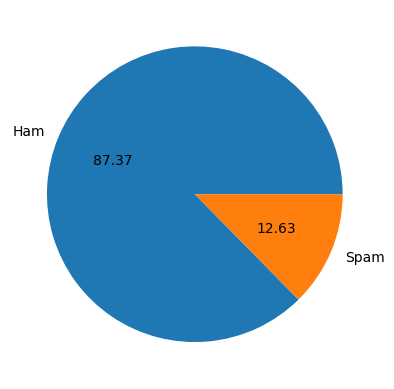

In [20]:
plt.pie(df['Target'].value_counts(), labels=['Ham', 'Spam'], autopct = "%0.2f")

__Data is highly imbalanced__

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

In [23]:
df['num_characters'] = df['Text'].apply(len)

In [24]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# Number of words:
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# Number of sentences:
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Ham Messages:
df[df['Target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Spam Messages:
df[df['Target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

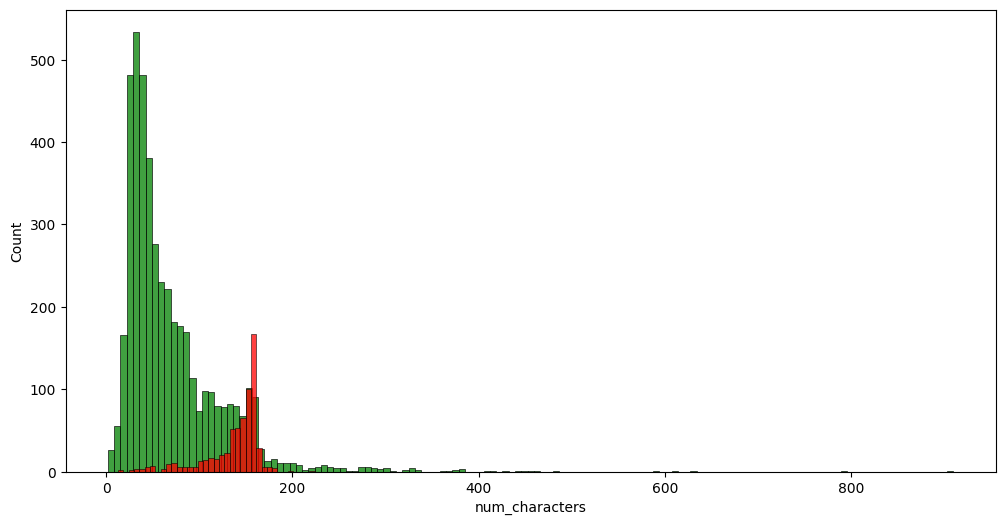

In [32]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'], color = 'green')
sns.histplot(df[df['Target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

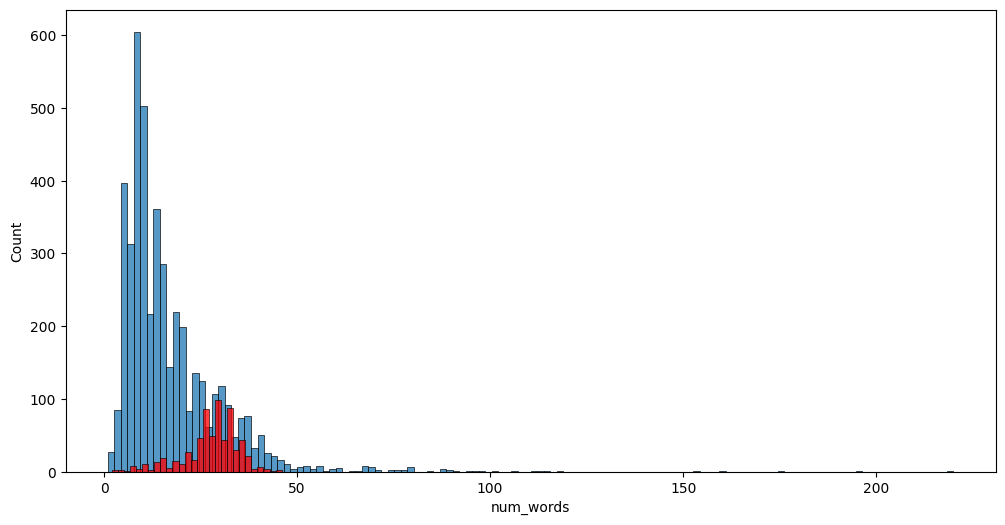

In [33]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color = 'red')

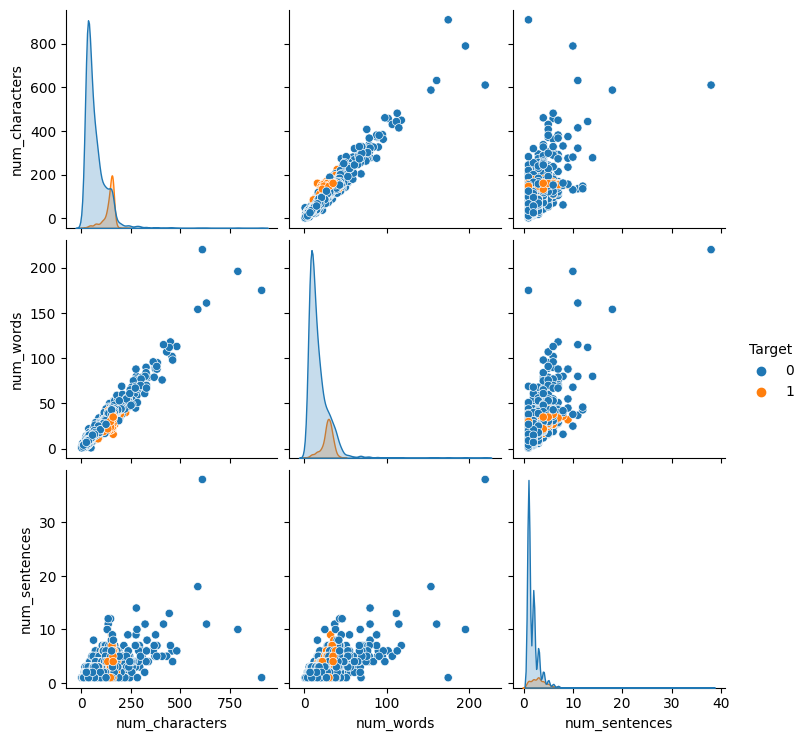

In [34]:
sns.pairplot(df, hue='Target')

In [35]:
df

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [36]:
dfcorr = df.copy()
dfcorr

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [37]:
dfcorr.drop(columns=['Text'], inplace=True)

In [38]:
dfcorr

,Target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


<Axes: >

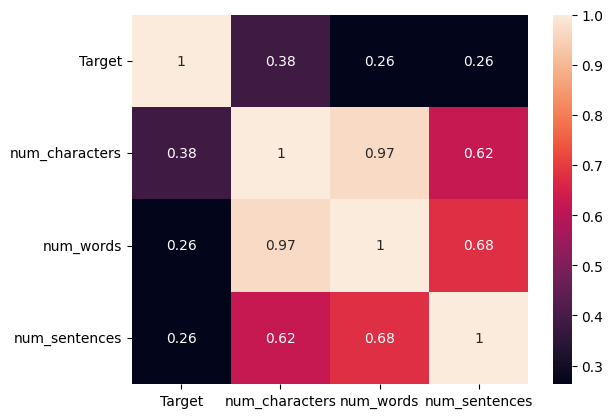

In [39]:
sns.heatmap(dfcorr.corr(), annot=True)

# Data PreProcessing:

Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [44]:
df['Transformed_text'] = df['Text'].apply(transform_text)

In [45]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Word Cloud Generation:

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [47]:
spam_wc = wc.generate(df[df['Target'] == 1] ['Transformed_text'].str.cat(sep= " "))

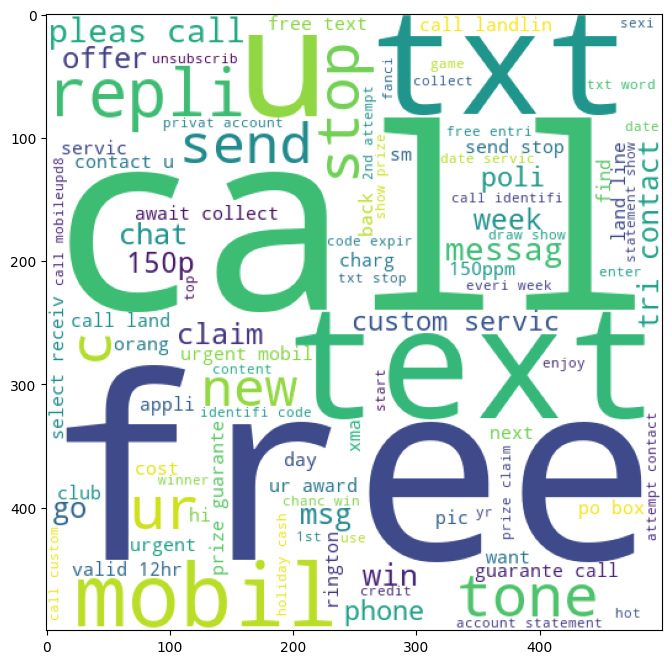

In [48]:
plt.figure(figsize = (12,8))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['Target'] == 0] ['Transformed_text'].str.cat(sep= " "))

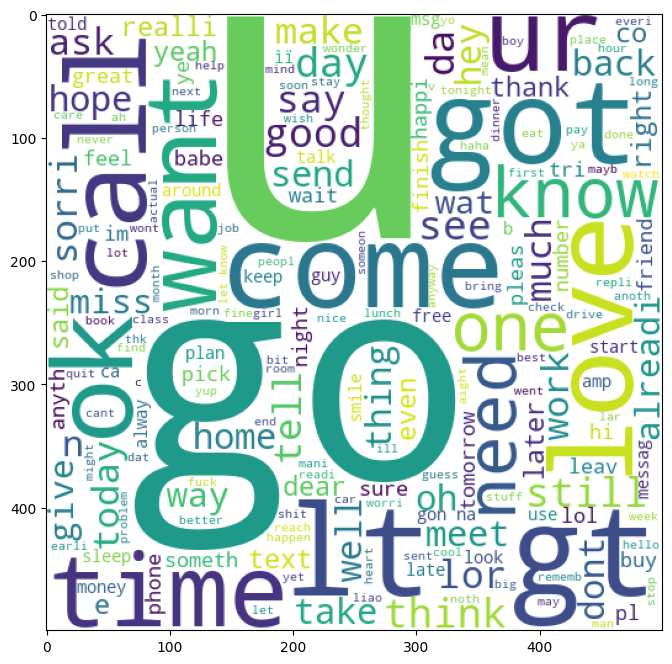

In [50]:
plt.figure(figsize = (12,8))
plt.imshow(ham_wc)

In [51]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['Target'] == 1] ['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

9939

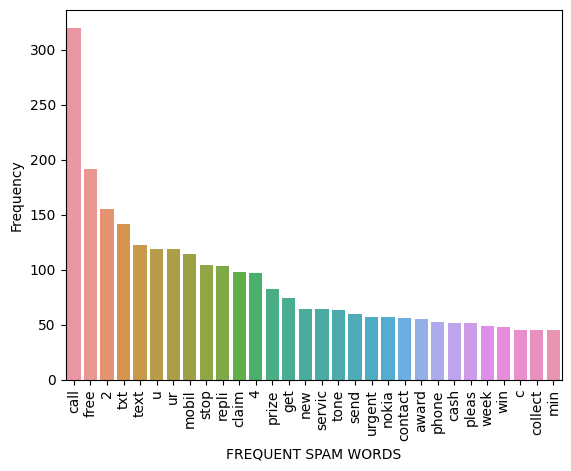

In [54]:
from collections import Counter
sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('FREQUENT SPAM WORDS')
plt.ylabel('Frequency')
plt.show()

In [55]:
ham_corpus = []
for msg in df[df['Target'] == 0] ['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

35404

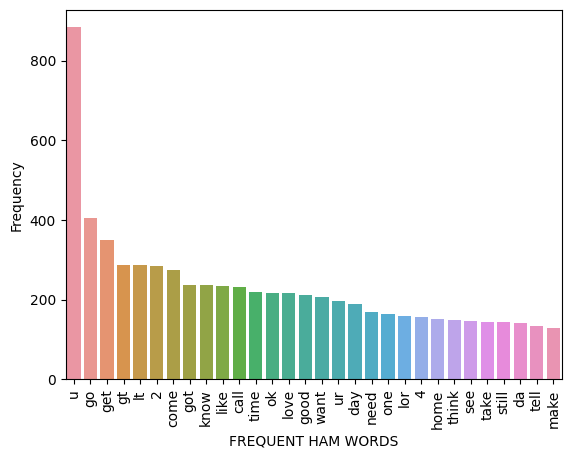

In [57]:
from collections import Counter
sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('FREQUENT HAM WORDS')
plt.ylabel('Frequency')
plt.show()

# Model Building:

In [160]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

In [129]:
#tfidf = TfidfVectorizer()

In [161]:
tfidf = TfidfVectorizer(max_features = 3000)

In [131]:
#X = cv.fit_transform(df['Transformed_text']).toarray()

In [162]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [133]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [164]:
# appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [165]:
X.shape

(5169, 3001)

In [166]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [169]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [170]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [171]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [172]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [173]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


__Hence we are going with tfidf --> MNB__

In [174]:
# Testing various models:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [175]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [176]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [177]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [178]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8665377176015474, 0.0)

In [179]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("----------------------------------------------")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
----------------------------------------------
For  KN
Accuracy -  0.9323017408123792
Precision -  0.8148148148148148
----------------------------------------------
For  NB
Accuracy -  0.9410058027079303
Precision -  1.0
----------------------------------------------
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8773584905660378
----------------------------------------------
For  LR
Accuracy -  0.9613152804642167
Precision -  0.9622641509433962
----------------------------------------------
For  RF
Accuracy -  0.9690522243713733
Precision -  0.9818181818181818
----------------------------------------------
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
----------------------------------------------
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.8992248062015504
----------------------------------------------
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
------

In [180]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [181]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.941006,1.000000
5,RF,0.969052,0.981818
8,ETC,0.978723,0.975410
4,LR,0.961315,0.962264
10,xgb,0.971954,0.943089
6,AdaBoost,0.964217,0.931624
9,GBDT,0.950677,0.930693
7,BgC,0.966151,0.899225
3,DT,0.943907,0.877358
1,KN,0.932302,0.814815


In [182]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [183]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.941006
1,RF,Accuracy,0.969052
2,ETC,Accuracy,0.978723
3,LR,Accuracy,0.961315
4,xgb,Accuracy,0.971954
5,AdaBoost,Accuracy,0.964217
6,GBDT,Accuracy,0.950677
7,BgC,Accuracy,0.966151
8,DT,Accuracy,0.943907
9,KN,Accuracy,0.932302


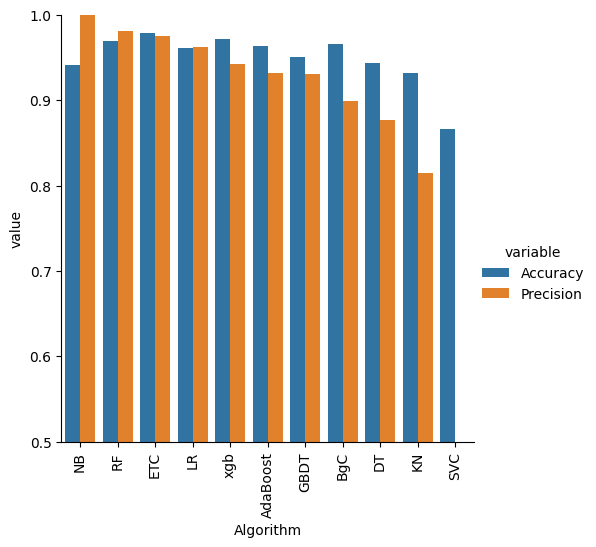

In [184]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improvement:
Changing the max_features parameter of TfIdf

In [155]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [156]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [157]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,RF,0.975822,0.982906,0.975822,0.982906
1,KN,0.905222,0.976190,0.905222,0.976190
2,ETC,0.974855,0.974576,0.974855,0.974576
3,LR,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154
5,xgb,0.967118,0.933333,0.967118,0.933333
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,SVC,0.969052,0.927419,0.969052,0.927419
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217


In [159]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,SVC,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [185]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [186]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190,0.932302,0.814815
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
3,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286,0.961315,0.962264
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154,0.941006,1.000000
5,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.971954,0.943089
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
7,SVC,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419,0.866538,0.000000
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.950677,0.930693
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225


In [187]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [188]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [189]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [190]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.941972920696325
Precision 1.0


In [191]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [192]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [193]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9836065573770492


In [194]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))